In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x_train=np.array([1100, 1400, 1425, 1550, 1600, 1700, 1750, 1800, 1875, 2000, 2100, 2250, 2300, 2400, 2450, 2600, 2800, 2900, 3000, 3150, 3300])
y_train=np.array([199000, 245000, 230000, 215000, 280000, 295000, 345000, 315000, 325000, 360000, 350000, 385000, 390000, 425000, 415000, 455000, 465000, 495000, 510000, 545000, 570000])
x_mean=np.mean(x_train)
x_std=np.std(x_train)
y_mean=np.mean(y_train)
y_std=np.std(y_train)
x_scaled=(x_train-x_mean)/x_std
y_scaled=(y_train-y_mean)/y_std
m=len(x_train)
X_design = np.c_[np.ones(m), x_scaled]

In [15]:
def compute_cost(h,y):
    cost = (1/(2*m)) * np.sum((h-y)**2)
    return cost

In [16]:
alpha=0.1
iterations = 2000
theta=np.zeros(2)
cost_history=[]

for _ in range(iterations):
    h=np.dot(X_design, theta)
    grad=np.dot(X_design.T, (h-y_scaled)) / m
    theta-=alpha*grad
    cost_history.append(compute_cost(h,y_scaled))

In [24]:
slope=(theta[1] * y_std) / x_std
intercept =y_mean - (slope * x_mean) + (theta[0] * y_std)
print("m = ", slope)
print("b = ", intercept)

x_test=int(2500)
norm_x=(x_test-x_mean)/x_std
test_vector = np.array([1,norm_x])
y_pred_scaled=np.dot(test_vector,theta)
y_pred=(y_pred_scaled*y_std)+y_mean
print(f"Predicted prrice: {y_pred:.2f}")

m =  171.17327329376172
b =  1627.3680380251985
Predicted prrice: 429560.55


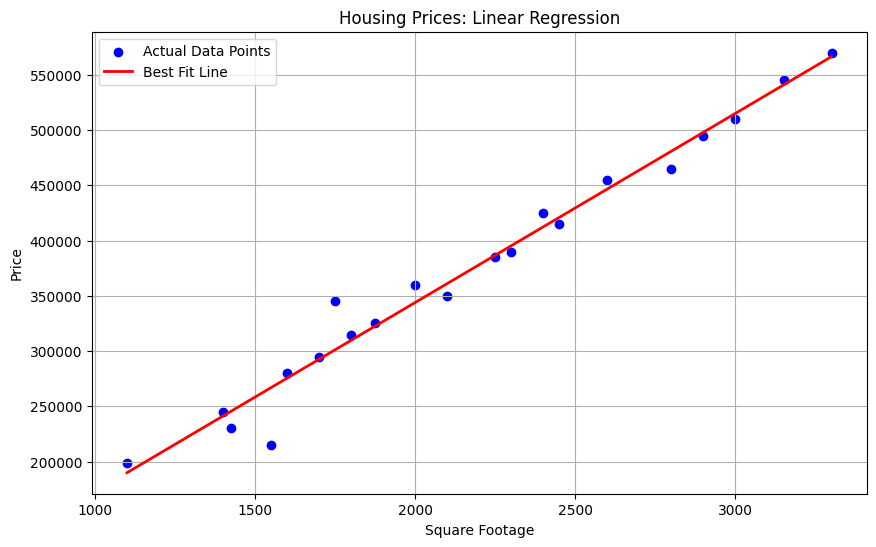

In [25]:
y_line=slope*x_train+intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Actual Data Points')
plt.plot(x_train, y_line, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Housing Prices: Linear Regression')
plt.legend()
plt.grid(True)
plt.show()